In [56]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split


In [57]:
data = pd.read_csv("room-occupancy.csv")
data

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.700000,26.272000,585.200000,749.200000,0.004764,1
1,23.718000,26.290000,578.400000,760.400000,0.004773,1
2,23.730000,26.230000,572.666667,769.666667,0.004765,1
3,23.722500,26.125000,493.750000,774.750000,0.004744,1
4,23.754000,26.200000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...
2660,24.290000,25.700000,808.000000,1150.250000,0.004829,1
2661,24.330000,25.736000,809.800000,1129.200000,0.004848,1
2662,24.330000,25.700000,817.000000,1125.800000,0.004841,1
2663,24.356667,25.700000,813.000000,1123.000000,0.004849,1


In [58]:
data.isnull().any()

Temperature      False
Humidity         False
Light            False
CO2              False
HumidityRatio    False
Occupancy        False
dtype: bool

<AxesSubplot:>

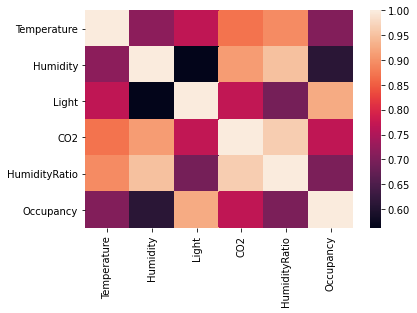

In [59]:
sns.heatmap(data = data.corr())

In [60]:
dict = {}
for col in list(data.columns):
    dict[col] = data[col].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"]).T

,unique count
Temperature,335
Humidity,725
Light,428
CO2,1894
HumidityRatio,1505
Occupancy,2


In [61]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,2665.0,21.433876,1.028024,20.200000,20.650000,20.890000,22.356667,24.408333
Humidity,2665.0,25.353937,2.436842,22.100000,23.260000,25.000000,26.856667,31.472500
Light,2665.0,193.227556,250.210906,0.000000,0.000000,0.000000,442.500000,1697.250000
CO2,2665.0,717.906470,292.681718,427.500000,466.000000,580.500000,956.333333,1402.250000
HumidityRatio,2665.0,0.004027,0.000611,0.003303,0.003529,0.003815,0.004532,0.005378
Occupancy,2665.0,0.364728,0.481444,0.000000,0.000000,0.000000,1.000000,1.000000


In [62]:
data.head(10)

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,23.7000,26.272,585.200000,749.200000,0.004764,1
1,23.7180,26.290,578.400000,760.400000,0.004773,1
2,23.7300,26.230,572.666667,769.666667,0.004765,1
3,23.7225,26.125,493.750000,774.750000,0.004744,1
4,23.7540,26.200,488.600000,779.000000,0.004767,1
5,23.7600,26.260,568.666667,790.000000,0.004779,1
6,23.7300,26.290,536.333333,798.000000,0.004776,1
7,23.7540,26.290,509.000000,797.000000,0.004783,1
8,23.7540,26.350,476.000000,803.200000,0.004794,1
9,23.7360,26.390,510.000000,809.000000,0.004796,1


In [63]:
X = data.drop("Occupancy",axis=1)
Y = data["Occupancy"]
print(X.shape)
Y.shape

(2665, 5)


(2665,)

In [64]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled.shape

(2665, 5)

In [65]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)
print(f"{X_train.shape}\n{X_test.shape}\n{Y_train.shape}\n{Y_test.shape}")

(1865, 5)
(800, 5)
(1865,)
(800,)


In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score


In [80]:
precision = []
accuracy = []
recall = []
model = []
models  = [ LogisticRegression(),LinearSVC(),DecisionTreeClassifier(),RandomForestClassifier(), GaussianNB(),KNeighborsClassifier()]
for obj in models:
    model_name = type(obj).__name__
    obj.fit(X_train,Y_train)
    predict=obj.predict(X_test)
    precision.append(precision_score(Y_test,predict))
    model.append(model_name)
    accuracy.append(accuracy_score(Y_test,predict))
    recall.append(recall_score(Y_test,predict))

models = pd.DataFrame({'Model':model, 'Accuray':accuracy, 'Precision':precision, 'Recall': recall})
print(models)

C:\Users\Yash\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


                    Model  Accuray  Precision    Recall
0      LogisticRegression  0.97000   0.921824  1.000000
1               LinearSVC  0.97000   0.921824  1.000000
2  DecisionTreeClassifier  0.98125   0.955782  0.992933
3  RandomForestClassifier  0.98125   0.952703  0.996466
4              GaussianNB  0.95000   0.876161  1.000000
5    KNeighborsClassifier  0.98000   0.946488  1.000000
